In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bokeh.palettes import Paired, Spectral6
from sklearn.cluster import KMeans
import numpy as np

In [4]:
def load_data(path):
    data = pd.read_csv(path)
    return data

## Load Data

In [5]:
data = load_data('Mall_Customers.csv')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis

### Gender Distribution 

In [13]:
data[['Gender', 'CustomerID']].groupby('Gender').count().reset_index()

,Gender,CustomerID
0,Female,112
1,Male,88


In [23]:
labels = list(data['Gender'].unique())
labels

['Male', 'Female']

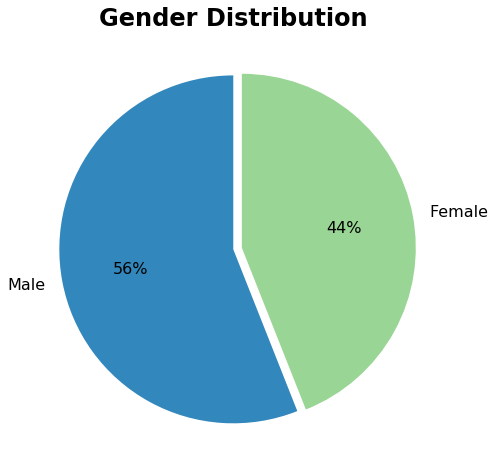

In [35]:
gender = data['Gender'].value_counts()
labels = list(data['Gender'].unique())
len_colors = len(labels)
colors = Spectral6
explode = [0, 0.05]
plt.figure(figsize=(8,8))
print('')
plt.title('Gender Distribution', fontsize = 24, fontweight='bold') 
plt.pie(gender, colors = colors[0:len_colors], autopct = '%1.0f%%', labels = labels, explode = explode, startangle=90, textprops={'fontsize': 16})
plt.show()

### Customer Age Distribution

#### Function to to categorize by age in groups

In [43]:
#function to categorize by age
def agegroup(df):
    if (df.Age<=17):
        return "<18"
    elif ((df.Age>=18) and (df.Age<=24)):
        return "18-24"
    elif ((df.Age>=25) and (df.Age<=34)):
        return "25-34"
    elif ((df.Age>=35) and (df.Age<=44)):
        return "35-44"
    elif ((df.Age>=45) and (df.Age<=54)):
        return "45-54"
    elif ((df.Age>=55) and (df.Age<=64)):
        return "55-64"
    else:
        return "65+"

In [44]:
#add age group to the dataframe
data['AGEGROUP'] = data.apply(agegroup, axis=1)

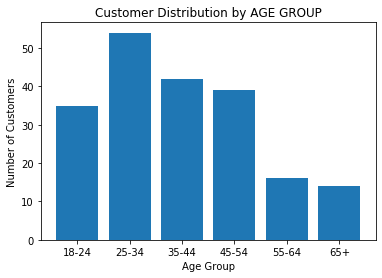

In [49]:
dist_by_agegroup = data[['AGEGROUP','CustomerID']].groupby('AGEGROUP').count().reset_index()
#plot the graph
fig = plt.figure()
group = dist_by_agegroup['AGEGROUP']
customer_count = dist_by_agegroup['CustomerID']
plt.bar(group,customer_count)
plt.title('Customer Distribution by Age Group')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.show()

### Annual Income Distribution

In [73]:
def plot_histogram(df, x_column, num_bins, colour):
    plt.title('Distribution of ' + x_column)
    plt.xlabel(x_column)
    plt.hist(df[x_column], bins=num_bins, color = colour)
    plt.show()

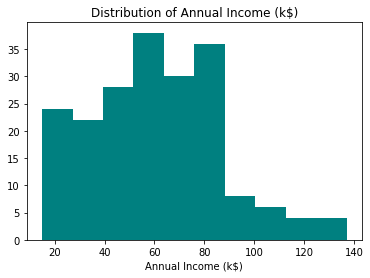

In [85]:
plot_histogram(data, 'Annual Income (k$)', 10, 'teal')


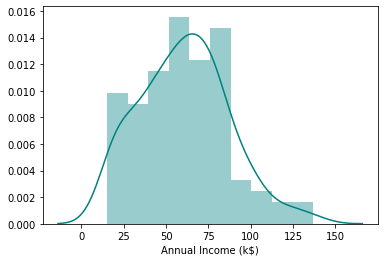

In [86]:
sns.distplot(data['Annual Income (k$)'], bins=10, color = 'teal');

### Spending Score Distribution

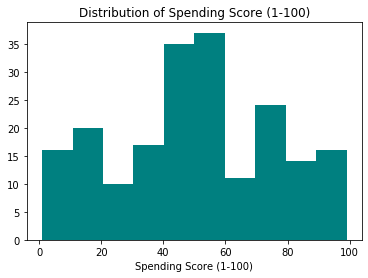

In [134]:
plot_histogram(data, 'Spending Score (1-100)', 10, 'teal')

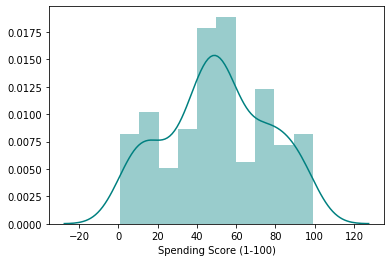

In [135]:
sns.distplot(data['Spending Score (1-100)'], bins=10, color = 'teal');

### Average Annual Income vs Spending Score by Gender

In [131]:
avgeraged_data = data[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']].groupby('Gender').mean().reset_index()
avgeraged_data

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.250000,51.526786
1,Male,62.227273,48.511364


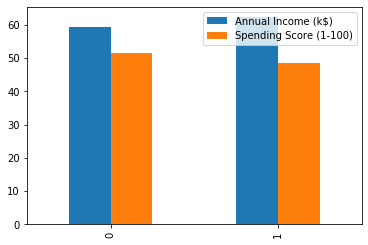

In [132]:
avgeraged_data.plot.bar()
plt.show()

#### Function to plot scatter plot

In [59]:
def scatter_plot(df, x_column, y_column, colour):
    plt.scatter(df[x_column], df[y_column], color=colour,alpha=0.5)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(x_column + ' vs ' + y_column)
    plt.show()

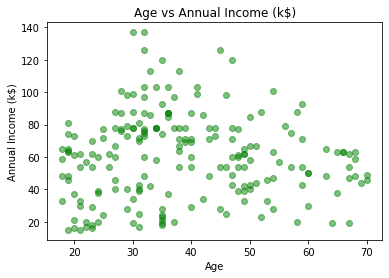

In [89]:
scatter_plot(data, 'Age', 'Annual Income (k$)', 'g')

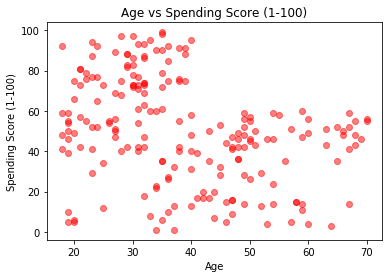

In [65]:
scatter_plot(data, 'Age', 'Spending Score (1-100)', 'r')

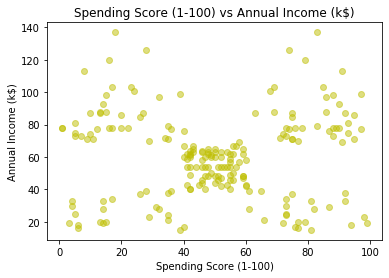

In [68]:
scatter_plot(data, 'Spending Score (1-100)', 'Annual Income (k$)', 'y')

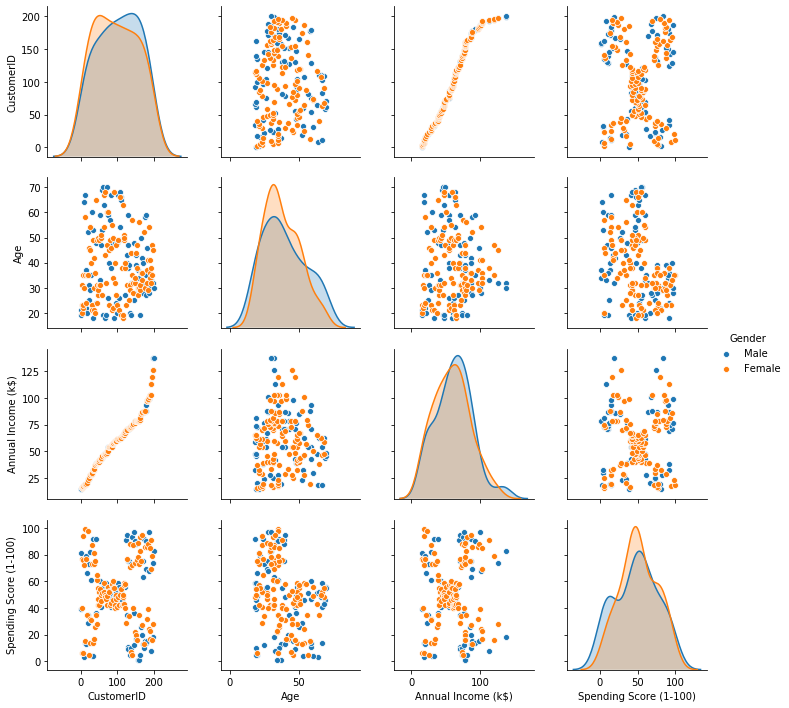

In [70]:
sns.pairplot(data, hue='Gender', diag_kind='kde')
plt.show()

### K-Means Clustering

In [142]:
income = data['Annual Income (k$)'].values
spending_score = data['Spending Score (1-100)'].values
X=np.array(list(zip(income,spending_score)))

In [167]:
test = KMeans()
test

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Let us run through few K values to decide on the optimal number

In [179]:
variance = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, max_iter=30).fit(X)
    variance.append(kmeans.inertia_)


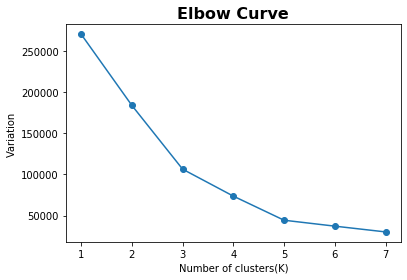

In [188]:
plt.plot(range(1,8), variance, marker = 'o')
plt.xlabel('Number of clusters(K)')
plt.ylabel('Variation')
plt.title('Elbow Curve', fontsize = 16, fontweight='bold')
plt.show()

### Training and Prediction

In [181]:
kmeans = KMeans(n_clusters=5, init='random',  max_iter=30, n_init=1, algorithm='full').fit(X)
y_pred = kmeans.predict(X)

### Plot predictions on scatter plot to identify customer groups

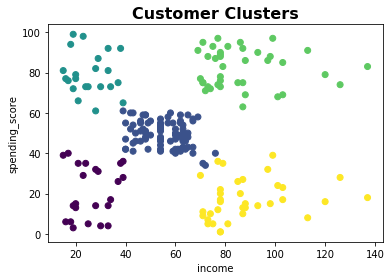

In [189]:
# Plot data and indicate clusters by color
plt.xlabel('income')
plt.ylabel('spending_score')
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Customer Clusters', fontsize = 16, fontweight = 'bold')
plt.show()
group_1=[]
group_2=[]
for count,single_label in enumerate(kmeans.labels_):
    if  single_label==0:
        group_1.append(X[count])
    elif single_label==1:
        group_2.append(X[count])   
group1_np=np.array(group_1)
group2_np=np.array(group_2)

### Conclusion
1. Totally we have 5 optimal clusters.
2. teal and green clusters spend more.